In [1]:
import glob
import numpy as np
import os
import shutil
np.random.seed(42)
import cv2
import tensorflow as tf

In [2]:
train_dir = 'D:\\something-something-project\\train-images\\'
validation_dir = 'D:\\something-something-project\\validation-images\\'

In [3]:
## Train-Images
# Dropping_something : 29,521
# Holding_something : 47,244
# Moving_something : 106,433
# Picking_something : 7,191
# Poking_something : 26,184
# Pouring_something : 13,737
# Putting_something : 113,520
# Showing_something : 29,320
# Tearing_something : 22,206

## Validation-Images
# Dropping_something : 5,788
# Holding_something : 7,761
# Moving_something : 13,968
# Picking_something : 1,448
# Poking_something : 3,041
# Pouring_something : 3,834
# Putting_something : 14,758
# Showing_something : 4,922
# Tearing_something : 7,259


In [4]:
# listing images directory for train and validation
train_files = os.listdir(train_dir)
print (train_files)

validation_files = os.listdir(validation_dir)
print (validation_files)

['Dropping_something', 'Holding_something', 'Moving_something', 'Picking_something', 'Poking_something', 'Pouring_something', 'Putting_something', 'Showing_something', 'Tearing_something']
['Dropping_something', 'Holding_something', 'Moving_something', 'Picking_something', 'Poking_something', 'Pouring_something', 'Putting_something', 'Showing_something', 'Tearing_something']


In [5]:
# generating the full system path
train_files_dir = []
validation_files_dir = []

for f in train_files:
    if os.path.join(train_dir, f):
        train_files_dir.append(os.path.join(train_dir, f))
        
for f in validation_files:
    if os.path.join(validation_dir, f):
        validation_files_dir.append(os.path.join(validation_dir, f))
        
print (train_files_dir)
print (validation_files_dir)

['D:\\something-something-project\\train-images\\Dropping_something', 'D:\\something-something-project\\train-images\\Holding_something', 'D:\\something-something-project\\train-images\\Moving_something', 'D:\\something-something-project\\train-images\\Picking_something', 'D:\\something-something-project\\train-images\\Poking_something', 'D:\\something-something-project\\train-images\\Pouring_something', 'D:\\something-something-project\\train-images\\Putting_something', 'D:\\something-something-project\\train-images\\Showing_something', 'D:\\something-something-project\\train-images\\Tearing_something']
['D:\\something-something-project\\validation-images\\Dropping_something', 'D:\\something-something-project\\validation-images\\Holding_something', 'D:\\something-something-project\\validation-images\\Moving_something', 'D:\\something-something-project\\validation-images\\Picking_something', 'D:\\something-something-project\\validation-images\\Poking_something', 'D:\\something-somethin

In [6]:
# printing number of images in each directories
print ("Training Data")
for d in train_files_dir:
    print (d, len(os.listdir(d)))

Training Data
D:\something-something-project\train-images\Dropping_something 15941
D:\something-something-project\train-images\Holding_something 25433
D:\something-something-project\train-images\Moving_something 56940
D:\something-something-project\train-images\Picking_something 3841
D:\something-something-project\train-images\Poking_something 14179
D:\something-something-project\train-images\Pouring_something 7280
D:\something-something-project\train-images\Putting_something 64208
D:\something-something-project\train-images\Showing_something 15682
D:\something-something-project\train-images\Tearing_something 11816


In [7]:
# printing number of images in each directories
print ("Validation Data")
for d in validation_files_dir:
    print (d, len(os.listdir(d)))

Validation Data
D:\something-something-project\validation-images\Dropping_something 3108
D:\something-something-project\validation-images\Holding_something 4148
D:\something-something-project\validation-images\Moving_something 7463
D:\something-something-project\validation-images\Picking_something 774
D:\something-something-project\validation-images\Poking_something 1618
D:\something-something-project\validation-images\Pouring_something 2023
D:\something-something-project\validation-images\Putting_something 7867
D:\something-something-project\validation-images\Showing_something 2627
D:\something-something-project\validation-images\Tearing_something 3851


In [8]:
def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (224, 224))
    return img

In [9]:
def load_img_data(training_files_dir):
    # print (training_files_dir)
    for d in training_files_dir:
        # print ('Directory: ', d)
        files = glob.glob(d + "/*.jpg")
        files = files[:3000]
        # print (len(files), type(files))
        train_img = tf.data.Dataset.from_tensor_slices(files)
        train_img = train_img.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)
        return train_img

In [10]:
train_img = load_img_data(train_files_dir)
validation_img = load_img_data(validation_files_dir)

In [11]:
list(validation_img.as_numpy_iterator())

[array([[[[225.       , 227.       , 224.       ],
          [225.       , 227.       , 224.       ],
          [225.       , 227.       , 224.       ],
          ...,
          [ 38.973774 ,  18.973772 ,   9.973772 ],
          [ 37.359375 ,  17.359375 ,   9.640625 ],
          [ 37.       ,  17.       ,  10.       ]],
 
         [[225.       , 227.       , 224.       ],
          [225.       , 227.       , 224.       ],
          [225.       , 227.       , 224.       ],
          ...,
          [ 38.237164 ,  18.237165 ,   9.237165 ],
          [ 37.359375 ,  17.359375 ,   9.640625 ],
          [ 37.       ,  17.       ,  10.       ]],
 
         [[225.       , 227.       , 224.       ],
          [225.       , 227.       , 224.       ],
          [225.       , 227.       , 224.       ],
          ...,
          [ 38.047432 ,  18.047434 ,   9.047433 ],
          [ 37.359375 ,  17.359375 ,   9.640625 ],
          [ 37.       ,  17.       ,  10.       ]],
 
         ...,
 
         [[2

In [12]:
tf.__version__

'2.1.0'

In [13]:
train_img = list(train_img.as_numpy_iterator())
validation_img = list(validation_img.as_numpy_iterator())

In [15]:
train_img = np.array(train_img)
validation_img = np.array(validation_img)

In [8]:
# loading training data
train_data = []
train_labels = []
for d in train_files_dir:
    print ('Directory: ', d)
    # commenting out so that one can read all the images, I have less RAM
    count = 0
    files = glob.glob(d + "/*.jpg")
    imgs = []
    for img in files:
        # print (img)
        if count == 3000:
            break
        if not os.path.isfile(img):
            continue
        imgs.append(cv2.imread(img))
        train_labels.append(d.split("D:\\something-something-project\\train-images\\")[1])
        count += 1
    train_data = train_data + imgs

Directory:  D:\something-something-project\train-images\Dropping_something
Directory:  D:\something-something-project\train-images\Holding_something
Directory:  D:\something-something-project\train-images\Moving_something
Directory:  D:\something-something-project\train-images\Picking_something
Directory:  D:\something-something-project\train-images\Poking_something
Directory:  D:\something-something-project\train-images\Pouring_something
Directory:  D:\something-something-project\train-images\Putting_something
Directory:  D:\something-something-project\train-images\Showing_something
Directory:  D:\something-something-project\train-images\Tearing_something


In [9]:
# loading validation data
validation_data = []
validation_labels = []
for d in validation_files_dir:
    print ('Directory: ', d)
    count = 0
    files = glob.glob(d + "/*.jpg")
    imgs = []
    for img in files:
        if count == 500:
            break
        if not os.path.isfile(img):
            continue
        imgs.append(cv2.imread(img))
        validation_labels.append(d.split("D:\\something-something-project\\validation-images\\")[1])
        count += 1
    validation_data = validation_data + imgs

Directory:  D:\something-something-project\validation-images\Dropping_something
Directory:  D:\something-something-project\validation-images\Holding_something
Directory:  D:\something-something-project\validation-images\Moving_something
Directory:  D:\something-something-project\validation-images\Picking_something
Directory:  D:\something-something-project\validation-images\Poking_something
Directory:  D:\something-something-project\validation-images\Pouring_something
Directory:  D:\something-something-project\validation-images\Putting_something
Directory:  D:\something-something-project\validation-images\Showing_something
Directory:  D:\something-something-project\validation-images\Tearing_something


In [10]:
print ("Train Data: ", len(train_data), "\tTrain Labels: ", len(train_labels))
print ("Validation Data: ", len(validation_data), "\tValidation Labels: ", len(validation_labels))

Train Data:  27000 	Train Labels:  27000
Validation Data:  4500 	Validation Labels:  4500


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline

Using TensorFlow backend.
C:\Users\Light\anaconda3\envs\dogs-vs-cats\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Light\anaconda3\envs\dogs-vs-cats\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Light\anaconda3\envs\dogs-vs-cats\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Light\anaconda3\e

In [25]:
# Training Data
IMG_DIM = (84, 84)

train_imgs = [img_to_array(cv2.resize(img, IMG_DIM)) for img in train_data]
train_imgs = np.array(train_imgs)

validation_imgs = [img_to_array(cv2.resize(img, IMG_DIM)) for img in validation_data]
validation_imgs = np.array(validation_imgs)

error: OpenCV(4.3.0) ..\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [12]:
# Training Data
IMG_DIM = (84, 84)
train_imgs = []
validation_imgs = []
for img in train_data:
    try:
        train_imgs.append(img_to_array(cv2.resize(img, IMG_DIM)))
    except Exception as e:
        print (e)
        continue
train_imgs = np.array(train_imgs)

for img in validation_data:
    try:
        validation_imgs.append(img_to_array(cv2.resize(img, IMG_DIM)))
    except Exception as e:
        print (e)
        continue
validation_imgs = np.array(validation_imgs)

OpenCV(4.3.0) ..\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.3.0) ..\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.3.0) ..\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.3.0) ..\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'



In [16]:
print('Train dataset shape:', train_img.shape, '\tValidation dataset shape:', validation_img.shape)

Train dataset shape: (188,) 	Validation dataset shape: (188,)


(84, 84, 3)


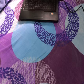

In [14]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [20]:
# parameters
batch_size = 30
num_classes = 9
epochs = 30
input_shape = (84, 84, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# one hot encoding for training and validation
label_encoder = LabelEncoder()
train_labels_integer_encoded = label_encoder.fit_transform(train_labels)
validation_labels_integer_encoded = label_encoder.fit_transform(validation_labels)

# print(train_labels_integer_encoded)

onehot_encoder = OneHotEncoder(sparse=False)
train_labels_integer_encoded = train_labels_integer_encoded.reshape(len(train_labels_integer_encoded), 1)
train_label_enc = onehot_encoder.fit_transform(train_labels_integer_encoded)

validation_labels_integer_encoded = validation_labels_integer_encoded.reshape(len(validation_labels_integer_encoded), 1)
validation_label_enc = onehot_encoder.fit_transform(validation_labels_integer_encoded)

# print(train_labels[1495:1505], train_labels_enc[1495:1505])

# # invert first example
# inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
# print(inverted)


In [21]:
# using pretrained VGG16 model

from keras.applications import vgg16
from keras.models import Model
import keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False
    
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

C:\Users\Light\anaconda3\envs\dogs-vs-cats\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000001F5B641E198>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x000001F5D6E9CD68>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x000001F5B641EAC8>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000001F76F8289E8>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000001F76F828A20>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000001F76FD6BE80>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000001F76FDC2470>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000001F76FDC2F60>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000001F76FDD3E10>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000001F76FE0CC88>,block3_conv3,False



(1, 2, 2, 512)


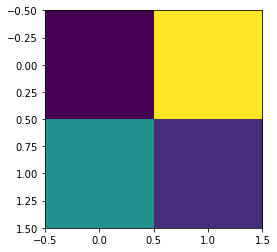

In [22]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [23]:
# getting the output format of VGG16 to make it sync with our output layer

def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (26996, 2048) 	Validation Bottleneck Features: (4500, 2048)


In [24]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

# Pre-trained CNN model as a Feature Extractor

In [25]:
# designing our output layer

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(9, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 4617      
Total params: 1,316,361
Trainable params: 1,316,361
Non-trainable params: 0
_________________________________________________________________


In [26]:
# running the model
history = model.fit(x=train_features_vgg, y=train_label_enc,
                    validation_data=(validation_features_vgg, validation_label_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

ValueError: Input arrays should have the same number of samples as target arrays. Found 26996 input samples and 27000 target samples.

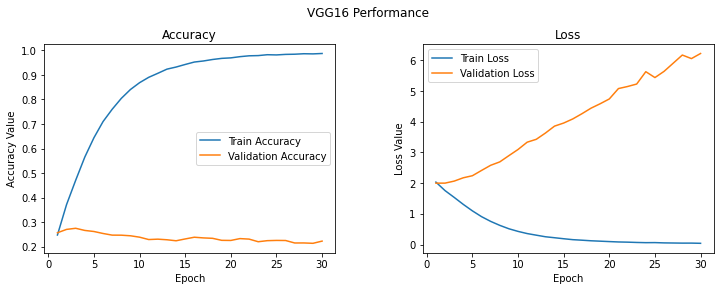

In [62]:
# plotting accuracy
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('VGG16 Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('action_detection_tlearn_VGG16_cnn.h5')

# Pre-trained CNN model as a Feature Extractor with Image Augmentation

In [64]:
# Generating Image augmentation

train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_label_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_label_enc, batch_size=20)

In [65]:
# designing the model and run
model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(9, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)

Epoch 1/100
100/100 [==============================] - 9s 85ms/step - loss: 2.3122 - accuracy: 0.1107 - val_loss: 2.2209 - val_accuracy: 0.1510
Epoch 2/100
100/100 [==============================] - 7s 73ms/step - loss: 2.2714 - accuracy: 0.1210 - val_loss: 2.1300 - val_accuracy: 0.1560
Epoch 3/100
100/100 [==============================] - 7s 72ms/step - loss: 2.2311 - accuracy: 0.1370 - val_loss: 2.1562 - val_accuracy: 0.1780
Epoch 4/100
100/100 [==============================] - 7s 67ms/step - loss: 2.2256 - accuracy: 0.1427 - val_loss: 2.1229 - val_accuracy: 0.1870
Epoch 5/100
100/100 [==============================] - 7s 67ms/step - loss: 2.1905 - accuracy: 0.1480 - val_loss: 2.1346 - val_accuracy: 0.1710
Epoch 6/100
100/100 [==============================] - 6s 62ms/step - loss: 2.1922 - accuracy: 0.1550 - val_loss: 2.1282 - val_accuracy: 0.1850
Epoch 7/100
100/100 [==============================] - 5s 53ms/step - loss: 2.1609 - accuracy: 0.1723 - val_loss: 1.9869 - val_accuracy:

In [66]:
def plot_accuracy(title, epochs):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    t = f.suptitle(title, fontsize=12)
    f.subplots_adjust(top=0.85, wspace=0.3)

    epoch_list = list(range(1, epochs+1))
    ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
    ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_xticks(np.arange(0, epochs+1, 5))
    ax1.set_ylabel('Accuracy Value')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Accuracy')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
    ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
    ax2.set_xticks(np.arange(0, epochs+1, 5))
    ax2.set_ylabel('Loss Value')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Loss')
    l2 = ax2.legend(loc="best")

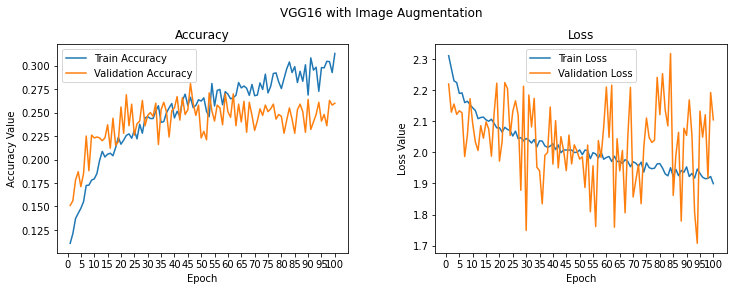

In [67]:
plot_accuracy("VGG16 with Image Augmentation", 100)

In [ ]:
model.save('action_detection_tlearn_VGG16_img_aug_cnn.h5')

# Pre-trained CNN model with Fine-tuning and Image Augmentation

In [69]:
# setting last few layers trainable of the VGG16 model

vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x000001D6FF6219E8>,input_4,False
1,<keras.layers.convolutional.Conv2D object at 0x000001D6FF621C50>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x000001D6FF6AE470>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x000001D6FF688D30>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x000001D6FF688D68>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x000001D6FF958C88>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x000001D6FF9A0CF8>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x000001D6FF9A0C88>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x000001D6FF9BF908>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x000001D6FFA26400>,block3_conv3,False


In [71]:
# using image augmentation and designing the output layer of the model and run
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_label_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_label_enc, batch_size=20)

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(9, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, 
                              verbose=1)

Epoch 1/100
100/100 [==============================] - 8s 84ms/step - loss: 2.2680 - accuracy: 0.1157 - val_loss: 2.1690 - val_accuracy: 0.1190
Epoch 2/100
100/100 [==============================] - 7s 75ms/step - loss: 2.2246 - accuracy: 0.1290 - val_loss: 2.1825 - val_accuracy: 0.1890
Epoch 3/100
100/100 [==============================] - 8s 75ms/step - loss: 2.1947 - accuracy: 0.1347 - val_loss: 2.1303 - val_accuracy: 0.1820
Epoch 4/100
100/100 [==============================] - 7s 72ms/step - loss: 2.1571 - accuracy: 0.1717 - val_loss: 2.1399 - val_accuracy: 0.2230
Epoch 5/100
100/100 [==============================] - 8s 76ms/step - loss: 2.1362 - accuracy: 0.1807 - val_loss: 2.0212 - val_accuracy: 0.2420
Epoch 6/100
100/100 [==============================] - 7s 72ms/step - loss: 2.1154 - accuracy: 0.1987 - val_loss: 2.0030 - val_accuracy: 0.2400
Epoch 7/100
100/100 [==============================] - 7s 72ms/step - loss: 2.1003 - accuracy: 0.2160 - val_loss: 1.9745 - val_accuracy:

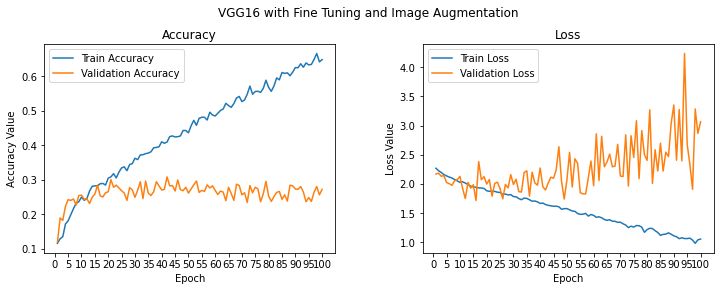

In [72]:
plot_accuracy("VGG16 with Fine Tuning and Image Augmentation", 100)

In [73]:
model.save('action_detection_tlearn_finetune_img_aug_cnn.h5')